# COVID-19 (Chinese tourists)

### 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었는지 알아보자

## 1. 모든 데이터를 불러올 함수 만들기

In [11]:
import pandas as pd
def create_kto_data(yyyy,mm):
    # 파일 불러오기
    file_path='G:/내 드라이브/파이썬/4_Tourists_Event/files/kto_{}{}.xlsx'.format(yyyy,mm)
    
    # 엑셀 불러오기
    # header:1열 목차로, skipfooter:밑에 4열 없앰, usecols:A에서 G열까지만 출력
    df=pd.read_excel(file_path,header=1,skipfooter=4,usecols='A:G')
    
    # '기준년월' 칼럼 추가
    df['기준년월']='{}-{}'.format(yyyy,mm)
    
    # '국적' 칼럼에서 특정 국적 제외
    ignore_list=['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    
    # ignore_list에 포함 되지 않는 국가명만 선택
    condition=(df['국적'].isin(ignore_list)==False)
    
    # 인덱스 초기화 # 로우 인덱스 값이 존재
    df_country=df[condition].reset_index(drop=True) 
    
    # '대륙' 칼럼 추가
    continents=['아시아']*25+['아프리카']*5+['유럽']*23+['대양주']*3+['아프리카']*2+['기타대륙']+['교포']
    df_country['대륙']=continents
    
    # 국가별 '관광객비율(%)' 칼럼 추가
    df_country['관광객비율(%)']=round(df_country.관광/df_country.계*100,1)
    
    # '전체비율(%)' 칼럼 추가 (전체 관광객중 해당 관광객)
    tourist_sum=sum(df_country['관광'])
    df_country['전체비율(%)']=round(df_country['관광']/tourist_sum*100,1)
    
    # 결과
    return(df_country)

In [12]:
# 2018년 10월 데이터 불러오기
kto_test=create_kto_data(2018,10)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,283494,1877,557,404,4136,290468,2018-10,아시아,97.6,22.3
1,대만,98567,71,17,102,1215,99972,2018-10,아시아,98.6,7.8
2,홍콩,60414,58,1,65,935,61473,2018-10,아시아,98.3,4.8
3,마카오,3619,3,0,7,29,3658,2018-10,아시아,98.9,0.3
4,태국,53366,56,222,62,6235,59941,2018-10,아시아,89.0,4.2


##  2. 모든 데이터 하나로 합치기

### (1) kto_(yyyydd)에 맞게 기준월일 (yyyydd)로 바꾸기 (이중 반목문)

In [14]:
for yyyy in range(2010,2021):
    for mm in range(1,13):
        mm_str=str(mm).zfill(2)
        yymm='{}{}'.format(yyyy,mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


### (2) 이중 반목문을 통해 데이터 하나로 합치기

In [15]:
df=pd.DataFrame()
# 연도는 2010년 부터 2020년도 까지
for yyyy in range(2010,2021):
    # 월은 1월부터 12일
    for mm in range(1,13):
        # 202006~202012까지의 데이터 누락 
        try :
            
            temp=create_kto_data(str(yyyy),str(mm).zfill(2))
            
            # 가져온 데이터 모두 합치기
            df=df.append(temp)
        except:
            pass

C:\Users\kuy20\AppData\Local\Temp\ipykernel_11620\3503315756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\kuy20\AppData\Local\Temp\ipykernel_11620\3503315756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\kuy20\AppData\Local\Temp\ipykernel_11620\3503315756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\kuy20\AppData\Local\Temp\ipykernel_11620\3503315756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp)
C:\Users\kuy20\AppData\Local\Temp\ipykernel_11620\3503315756.py:6: FutureWarning: The frame.append method is depreca

In [16]:
df.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
5,말레이시아,3292,61,0,49,1157,4559,2010-01,아시아,72.2,0.8
6,필리핀,3984,219,104,87,16820,21214,2010-01,아시아,18.8,1.0
7,인도네시아,1840,327,3,65,2826,5061,2010-01,아시아,36.4,0.5
8,싱가포르,4201,120,3,27,1017,5368,2010-01,아시아,78.3,1.0
9,미얀마,630,18,54,10,3882,4594,2010-01,아시아,13.7,0.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 59
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 703.1+ KB


### (3)  합친 데이터 저장

In [18]:
df.to_excel('G:/내 드라이브/파이썬/4_Tourists_Event/files/kto_total.xlsx',index=False)

## 4. 국적별 관광객 데이터 저장하기

In [20]:
cntry_list=df['국적'].unique()

In [21]:
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [24]:
len(cntry_list)

60

In [25]:
condition=(df['국적']=='중국')

In [27]:
df_2=df[condition]
df_2.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
17,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
17,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
17,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
17,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
17,중국,87080,12375,293,3293,47078,150119,2010-06,아시아,58.0,16.7
17,중국,122432,10608,239,4309,57600,195188,2010-07,아시아,62.7,22.6
17,중국,142180,11049,232,26427,62099,241987,2010-08,아시아,58.8,24.5
17,중국,93545,10013,293,11374,60971,176196,2010-09,아시아,53.1,17.1
17,중국,107237,11371,374,3102,59344,181428,2010-10,아시아,59.1,16.3


In [23]:
for cntry in cntry_list:
    # 국적 하나하나 대입
    condition=(df['국적']==cntry)
    df_filter=df[condition]
    
    # 국적명을 반영한 파일명 만들기
    file_path='G:/내 드라이브/파이썬/4_Tourists_Event/files/[국적별 관광객 데이터] {}.xlsx'.format(cntry)
    
    # 저장하기
    df_filter.to_excel(file_path, index=False)

## 5. 시각화

### (1) 시계열 그래프

In [29]:
import matplotlib.pyplot as plt

In [30]:
from matplotlib import font_manager, rc
import platform

if platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system()=='Darwin':
    rc('font',family='AppleGothic')
else:
    print('Check your OS system')

In [31]:
# 중국
condition=(df['국적']=='중국')
df_filter=df[condition]
df_filter.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
17,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
17,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
17,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
17,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
17,중국,87080,12375,293,3293,47078,150119,2010-06,아시아,58.0,16.7
17,중국,122432,10608,239,4309,57600,195188,2010-07,아시아,62.7,22.6
17,중국,142180,11049,232,26427,62099,241987,2010-08,아시아,58.8,24.5
17,중국,93545,10013,293,11374,60971,176196,2010-09,아시아,53.1,17.1
17,중국,107237,11371,374,3102,59344,181428,2010-10,아시아,59.1,16.3


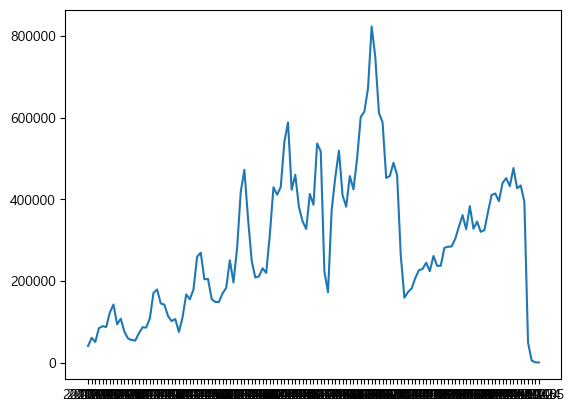

In [32]:
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.show()

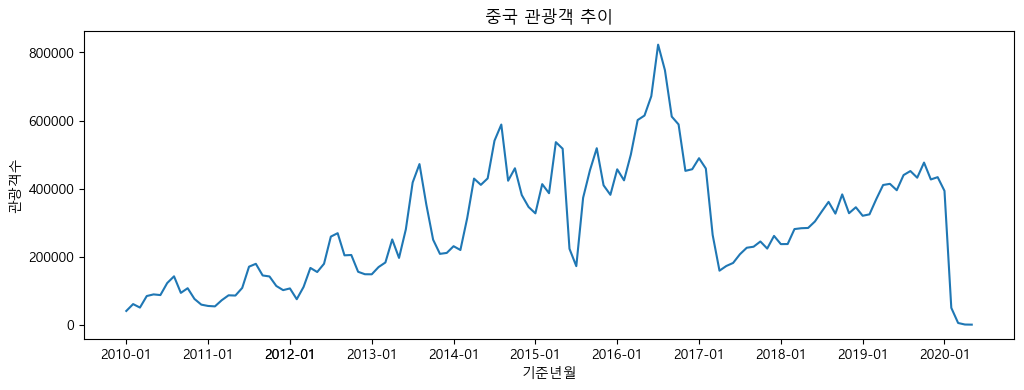

In [35]:
# 꾸미기
# 그래프 크기 조절
plt.figure(figsize=(12,4)) # 가로 12 세로 4

plt.plot(df_filter['기준년월'],df_filter['관광'])

# 그래프 & 축 이름
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금 값 설정
plt.xticks(['2010-01','2011-01','2012-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01',])

plt.show()


#### 1. 2015년 6월 전까지 증가 추세
#### 2. 2015년 6월에 관광객 수 감소 ( 메르스)
#### 3. 2017년 1월에도 관광객 수 감소(사스 보복)
#### 4. 2020년도에 거의 0에 가까워짐 (코로나)

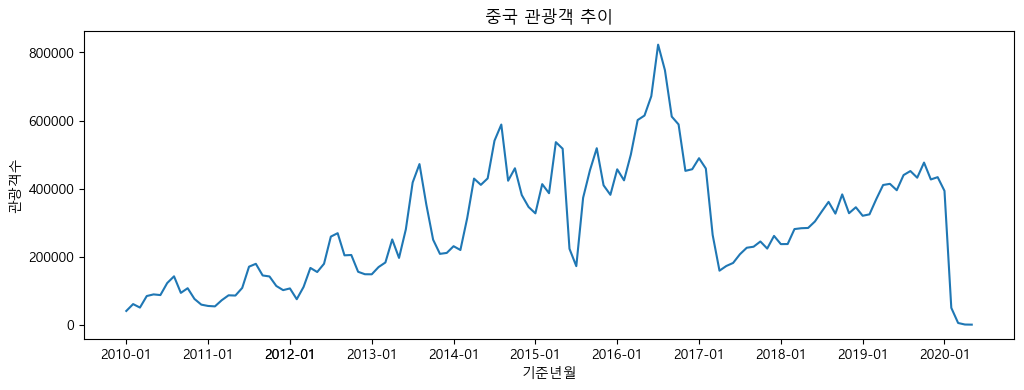

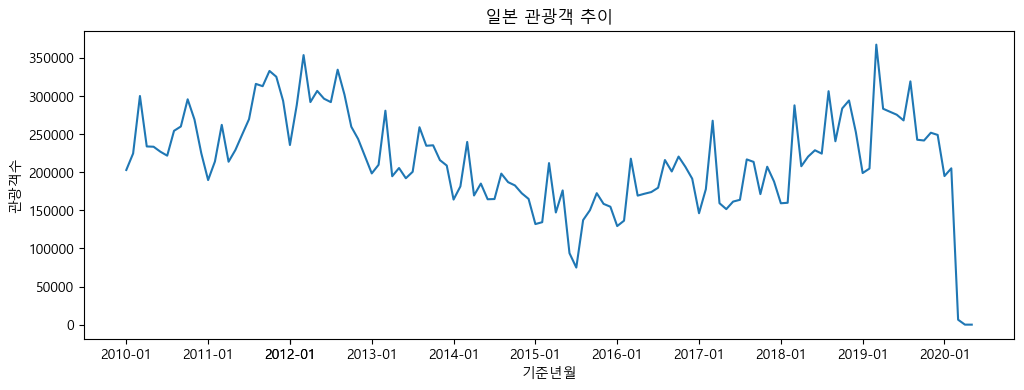

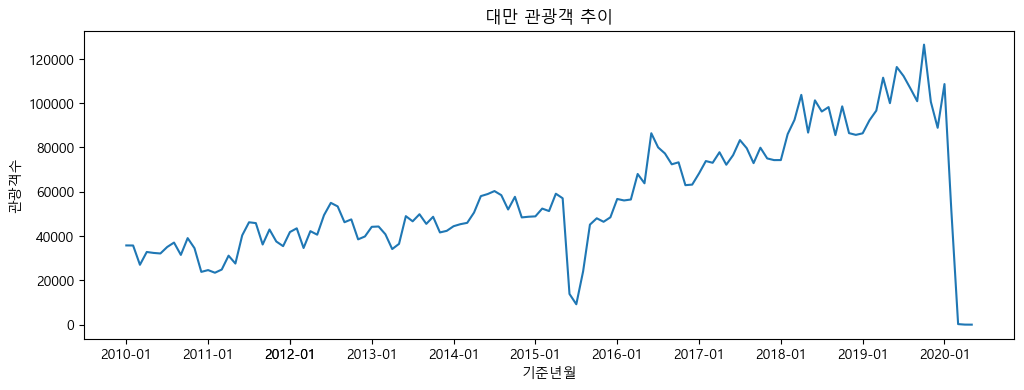

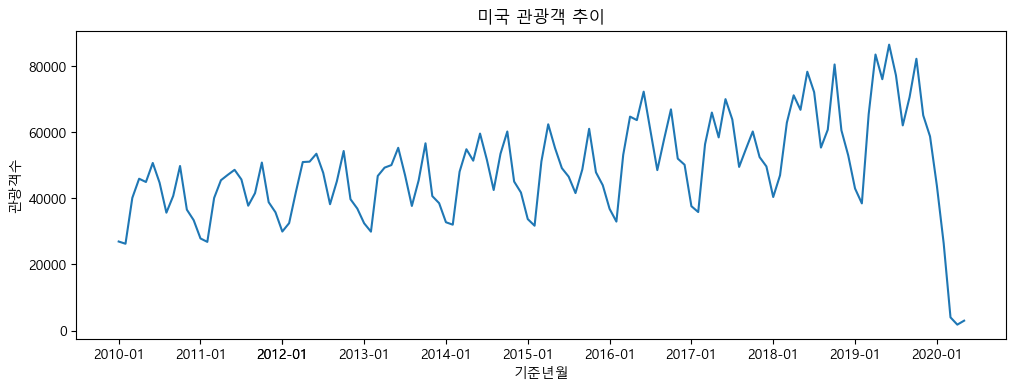

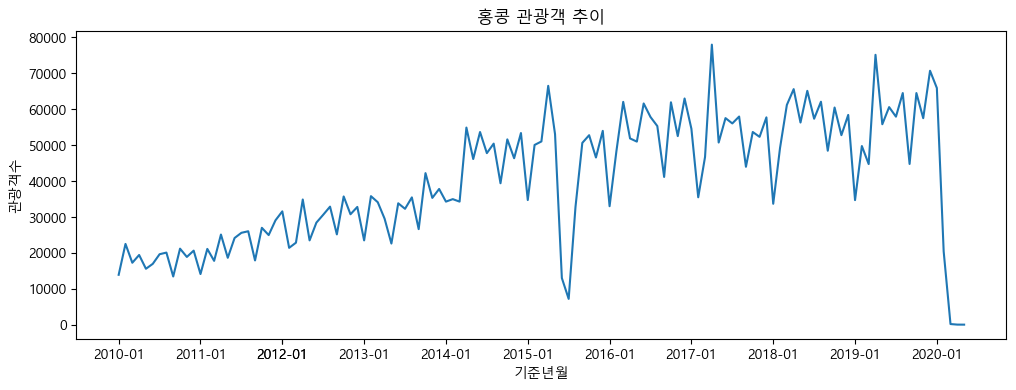

In [41]:
# 중국, 일본, 대만, 미국, 홍콩 시계열 그래프 그리기
cntry_list=['중국','일본', '대만', '미국', '홍콩']

for cntry in cntry_list:
    plt.figure(figsize=(12,4))
    condition=(df['국적']==cntry)
    df_filter=df[condition]
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    plt.title('{} 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    plt.xticks(['2010-01','2011-01','2012-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01',])
    plt.show()



### 히트맵

In [42]:
# 연도, 월 생성
df['년도']=df['기준년월'].str.slice(0,4)
df['월']=df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 중국
condition=(df['국적']=='중국')
df_filter=df[condition]

In [45]:
# 피벗테이블
df_pivot=df_filter.pivot_table(values='관광', index='년도',columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


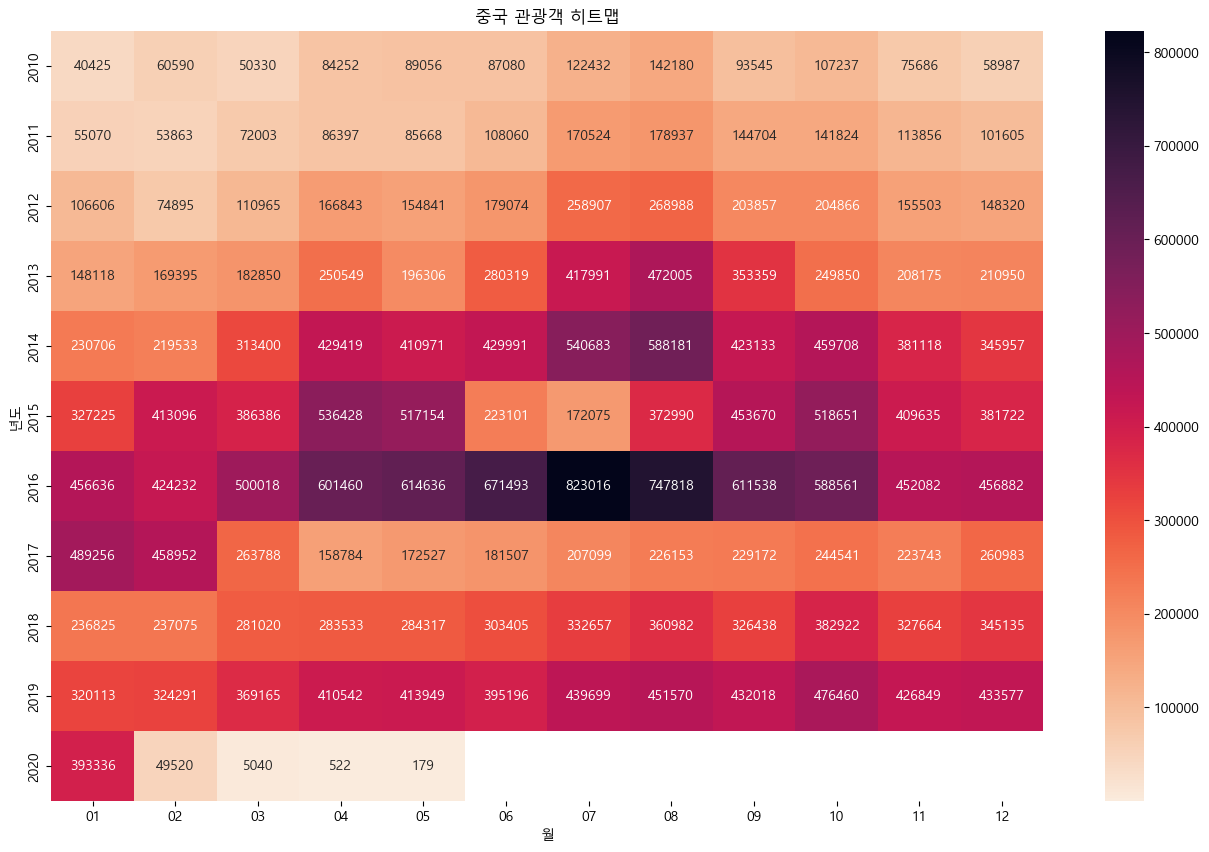

In [46]:
plt.figure(figsize=(16,10))
# annot:실제값 표시 fmt:소수점이 없는 실수형 cmap:색 조합
sns.heatmap(df_pivot, annot=True, fmt='.0f',cmap='rocket_r')
plt.title('중국 관광객 히트맵')
plt.show()

#### 1. 점차 증가하다가 2015년 6-7월에 감소 (메르스)
#### 2. 다시 증가하다가 2017년 4-6월 감소 (사드보복)
#### 3. 2020년 3-5월 대폭 감소 (코로나)

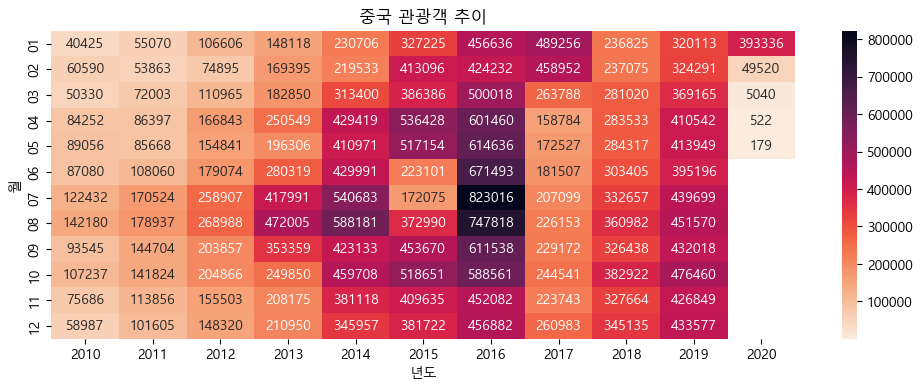

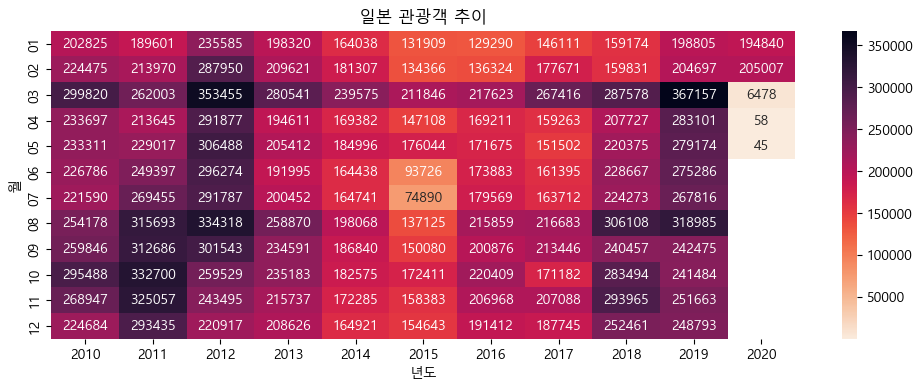

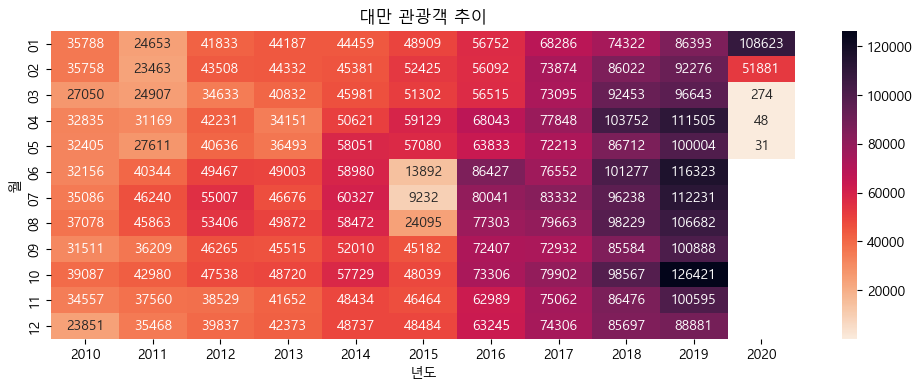

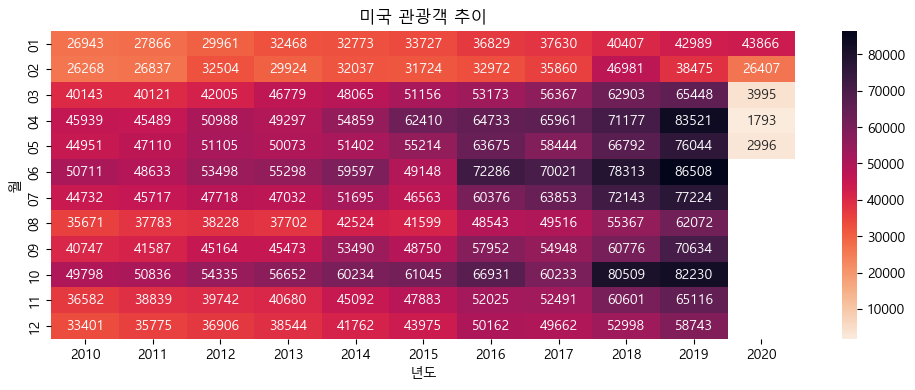

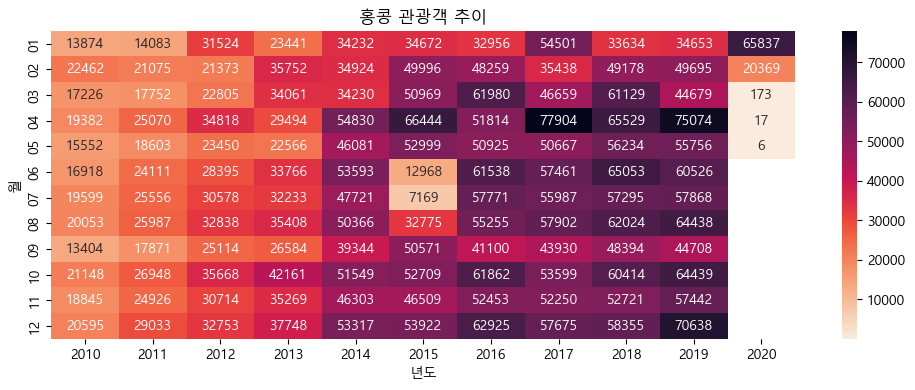

In [48]:
# 중국, 일본, 대만, 미국, 홍콩 시계열 그래프 그리기
cntry_list=['중국','일본', '대만', '미국', '홍콩']

for cntry in cntry_list:
    plt.figure(figsize=(12,4))
    condition=(df['국적']==cntry)
    df_filter=df[condition]
    
    df_pivot=df_filter.pivot_table(values='관광', index='월',columns='년도')
    sns.heatmap(df_pivot, annot=True, fmt='.0f',cmap='rocket_r')
    plt.title('{} 관광객 추이'.format(cntry))

    plt.show()
